Generalización con matrices unitarias

In [1]:
# Measurements
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute
from qiskit.visualization import plot_histogram 
from qiskit.quantum_info import Operator
from qiskit import IBMQ, Aer, transpile, assemble
import numpy as np
from numpy import exp, cos, sin, pi

In [2]:
# Definimos un  operador unitario arbitrario
def matriz(theta, phi, alpha, delta):
    U= np.matrix([[exp(-1j*phi)*cos(theta/2),exp(1j*alpha)*sin(theta/2)], 
                  [-exp(-1j*alpha)*sin(theta/2),exp(1j*phi)*cos(theta/2)]])
    UU = Operator (np.identity(2)*exp(1j*delta)*U) 
    return UU

In [3]:
def proceso(thetaA,thetaB,phiA,phiB,alphaA,alphaB,deltaA,deltaB):
    # Cargamos el simulador Aer
    simulator = Aer.get_backend("qasm_simulator")

    # Creamos un QC 
    qr = QuantumRegister(2, 'q')
    crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
    circuit = QuantumCircuit(qr, crz,crx)

    # Definimos la matriz de entrelazamiento
    I_2 = np.identity(4)    
    X_2 = np.matrix([[0,0,0,1], 
                       [0,0,1,0],
                       [0,1,0,0],
                       [1,0,0,0]])
    J_2 = Operator(1 / np.sqrt(2) * (I_2 + 1j *X_2))  
    J_2_dg = Operator(1 / np.sqrt(2) * (I_2 - 1j *X_2))
    
    U_A = matriz(thetaA,phiA,alphaA,deltaA)
    U_B = matriz(thetaB,phiB,alphaB,deltaB)
#     print(U_A)
#     print(U_B)

    # Generamos el circuito
    circuit.append(J_2, [0,1])
    circuit.append(U_A,[0]) # asignamos la puerta UA al jugador 1
    circuit.append(U_B,[1]) # asignamos la puerta UB al jugador 2
    circuit.append(J_2_dg, [0,1])

    # Medimos las qubits
    circuit.measure(qr[0],crz)
    circuit.measure(qr[1],crx)
    

    # Ejecutamos el circuito en el simulador qasm
    job = execute(circuit, simulator,shots=1024)
    # Los resultados de job
    result = job.result()
    # Contamos los resultados
    counts = result.get_counts(circuit)
#     print(counts,"\n")
    # Dibujamos el circuito
    dib = circuit.draw()
    print(dib,"\n")
    # Histograma de resultados
#     plot_histogram(counts)
    return plot_histogram(counts)

       ┌──────────┐┌─────────┐┌──────────┐┌─┐   
  q_0: ┤0         ├┤ unitary ├┤0         ├┤M├───
       │  unitary │├─────────┤│  unitary │└╥┘┌─┐
  q_1: ┤1         ├┤ unitary ├┤1         ├─╫─┤M├
       └──────────┘└─────────┘└──────────┘ ║ └╥┘
crz: 1/════════════════════════════════════╩══╬═
                                           0  ║ 
                                              ║ 
crx: 1/═══════════════════════════════════════╩═
                                              0  



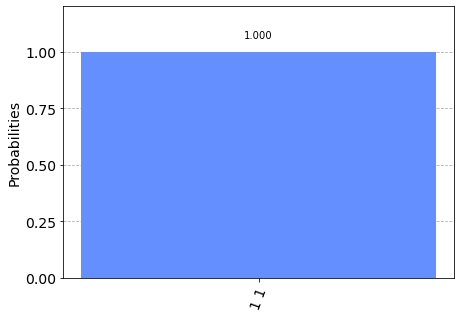

In [4]:
# Ejecutamos el caso clásico
proceso(pi,pi,0,0,0,0,0,0)

       ┌──────────┐┌─────────┐┌──────────┐┌─┐   
  q_0: ┤0         ├┤ unitary ├┤0         ├┤M├───
       │  unitary │├─────────┤│  unitary │└╥┘┌─┐
  q_1: ┤1         ├┤ unitary ├┤1         ├─╫─┤M├
       └──────────┘└─────────┘└──────────┘ ║ └╥┘
crz: 1/════════════════════════════════════╩══╬═
                                           0  ║ 
                                              ║ 
crx: 1/═══════════════════════════════════════╩═
                                              0  



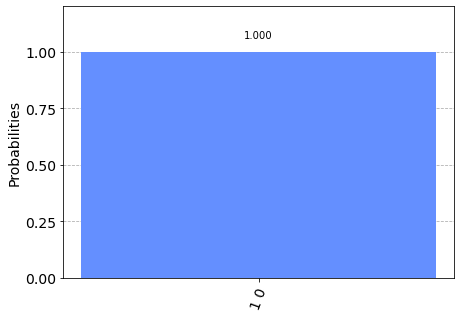

In [5]:
# Caso en el que gana jugador 1
proceso(pi,0,0,0,0,0,0,0)

       ┌──────────┐┌─────────┐┌──────────┐┌─┐   
  q_0: ┤0         ├┤ unitary ├┤0         ├┤M├───
       │  unitary │├─────────┤│  unitary │└╥┘┌─┐
  q_1: ┤1         ├┤ unitary ├┤1         ├─╫─┤M├
       └──────────┘└─────────┘└──────────┘ ║ └╥┘
crz: 1/════════════════════════════════════╩══╬═
                                           0  ║ 
                                              ║ 
crx: 1/═══════════════════════════════════════╩═
                                              0  



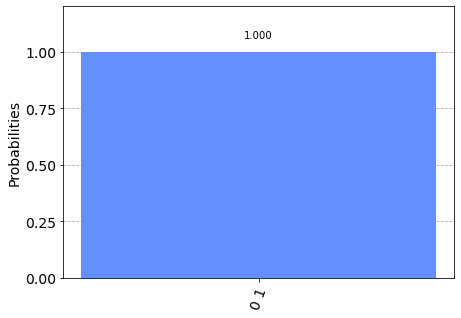

In [6]:
# Caso en el que gana jugador 2
proceso(0,pi,0,0,0,0,0,0)

       ┌──────────┐┌─────────┐┌──────────┐┌─┐   
  q_0: ┤0         ├┤ unitary ├┤0         ├┤M├───
       │  unitary │├─────────┤│  unitary │└╥┘┌─┐
  q_1: ┤1         ├┤ unitary ├┤1         ├─╫─┤M├
       └──────────┘└─────────┘└──────────┘ ║ └╥┘
crz: 1/════════════════════════════════════╩══╬═
                                           0  ║ 
                                              ║ 
crx: 1/═══════════════════════════════════════╩═
                                              0  



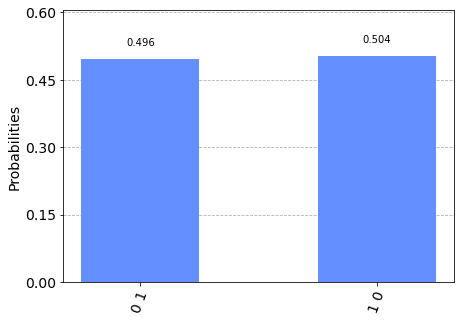

In [7]:
# Caso del prisionero cuántico
proceso(0,pi,pi/4,0,0,3*pi/2,pi/4,pi/2)

Empleando las definiciones de Qiskit, se reproduce el dilema del prisionero cuántico:

       ┌──────────┐┌───┐┌──────────┐┌─┐   
  q_0: ┤0         ├┤ X ├┤0         ├┤M├───
       │  unitary │├───┤│  unitary │└╥┘┌─┐
  q_1: ┤1         ├┤ S ├┤1         ├─╫─┤M├
       └──────────┘└───┘└──────────┘ ║ └╥┘
crz: 1/══════════════════════════════╩══╬═
                                     0  ║ 
                                        ║ 
crx: 1/═════════════════════════════════╩═
                                        0  



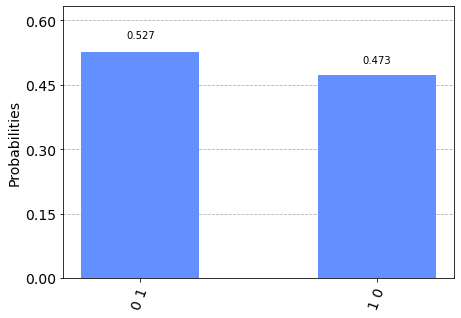

In [8]:
# Recordar correr el código que importa las librerías

# Cargamos el simulador Aer
simulator = Aer.get_backend("qasm_simulator")

# Creamos un QC
qr = QuantumRegister(2, 'q')
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
circuit = QuantumCircuit(qr, crz,crx)

I_2 = np.identity(4)
    
X_2 = np.matrix([[0,0,0,1], 
                   [0,0,1,0],
                   [0,1,0,0],
                   [1,0,0,0]])
J_2 = Operator(1 / np.sqrt(2) * (I_2 + 1j *X_2))  
J_2_dg = Operator(1 / np.sqrt(2) * (I_2 - 1j *X_2))


circuit.append(J_2, [0,1])
circuit.x(0) # asignamos la puerta x al jugador 1
circuit.s(1) # asignamos la puerta s al jugador 2
circuit.append(J_2_dg, [0,1])


circuit.measure(qr[0],crz)
circuit.measure(qr[1],crx)


# Ejecutamos el circuito en el simulador qasm
job = execute(circuit, simulator,shots=1024)
# Los resultados de job
result = job.result()
# Contamos los resultados
counts = result.get_counts(circuit)
# print(counts,"\n")
# Dibujamos el circuito
dib = circuit.draw()
print(dib,"\n")
# Histograma de resultados
plot_histogram(counts)